In [3]:
import pandas as pd

In [4]:
file_path = "C:/Users/domin/OneDrive/Studium/Master/Masterarbeit/Datasets/PET Lung - Nodules (main Dataset)/manifest-1608669183333/metadata.xlsx"
sheet_name = "in"
column_name = "Subject ID"

In [ ]:
try:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    unique_values = df[column_name].unique()
    print(unique_values)
except Exception as e:
    print(e)

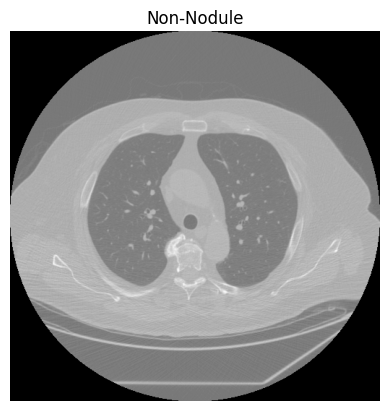

In [9]:
import pydicom
import matplotlib.pyplot as plt

# Load the DICOM file
dicom_file_path = "C:/Users/Dominik Hahn/OneDrive/Studium/Master/Masterarbeit/Daten/non-nodule/N0564_1-154.dcm"
ds = pydicom.dcmread(dicom_file_path)

# Extract the pixel data
pixel_array = ds.pixel_array

# Display the DICOM image
plt.imshow(pixel_array, cmap='gray')  # Use 'gray' colormap for medical images
plt.title("Non-Nodule")
plt.axis("off")  # Turn off axes for better visualization
plt.show()

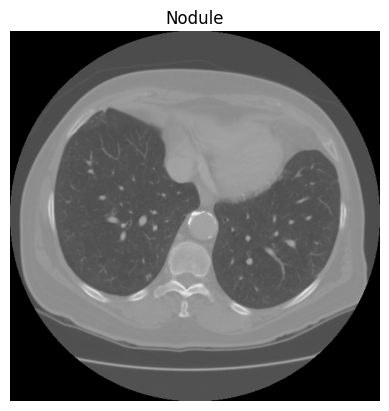

In [5]:
import pydicom
import matplotlib.pyplot as plt

# Load the DICOM file
dicom_file_path = "C:/Users/Dominik Hahn/OneDrive/Studium/Master/Masterarbeit/Datasets/LIDC-IDRI (including healthy patients)/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0006/01-01-2000-NA-NA-92500/3000556.000000-NA-20957/1-079.dcm"
ds = pydicom.dcmread(dicom_file_path)

# Extract the pixel data
pixel_array = ds.pixel_array

# Display the DICOM image
plt.imshow(pixel_array, cmap='gray')  # Use 'gray' colormap for medical images
plt.title("Nodule")
plt.axis("off")  # Turn off axes for better visualization
plt.show()